

# Project: Investigating tmdb-movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In my project, I have used the tmdb-movies dataset. 

> The dataset includes 21 columns such as revenue, budget, cast, etc. It includes the data of a total of 10,000 movies.

## Questions I have used:
> 1. What is the average runtime of a movie?
> 2. What is the profit for every movie?
> 3. On which genre most number of movies are released?
> 4. What is the relation between Profit and popularity?
> 5. Which actors are casted more number of times?

In [50]:
#importing the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> For more understanding and to make our calculation easy, we only need to keep the most relevant and required data. The elimination of the data will depend upon the questions proposed.

### General Properties

In [51]:
#Loading the dataset
df = pd.read_csv('tmdb-movies.csv')
#to view the top 3 rows of the dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Data Cleaning
> 1. Firstly, remove the unwanted data columns which is not required.
> 2. Discard the entries whose revenue and budget are listed as zero.
> 3. Replace the zero values with nan.
> 4.

In [52]:

#To find the number of rows and columns
df.shape


(10866, 21)

In [53]:
#to get the std, mean, max, min
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [54]:
#To find the datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [55]:
#To list number of unique features present
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [56]:
#to drop unwanted features
delcell = ['imdb_id','original_title','homepage','tagline','keywords','production_companies','overview','vote_count','budget_adj','revenue_adj']
df=df.drop(delcell,axis = 1)

In [57]:
df.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015


In [58]:
#To find duplicates
sum(df.duplicated())

1

In [59]:
#To drop the duplicates
df.drop_duplicates(inplace=True)

### Replacing zeros with nan

In [60]:
#Replacing zeros with nan
column=['budget','revenue']
df[column]=df[column].replace(0,np.nan)

In [61]:
#Dropping nan
df.dropna(subset=column,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
id              3854 non-null int64
popularity      3854 non-null float64
budget          3854 non-null float64
revenue         3854 non-null float64
cast            3850 non-null object
director        3853 non-null object
runtime         3854 non-null int64
genres          3854 non-null object
release_date    3854 non-null object
vote_average    3854 non-null float64
release_year    3854 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 361.3+ KB


In [63]:
df.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,release_date,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis


### 1.What is the average runtime of a movie?


In [67]:
#defining a function to find average of a column
def average(column):
    return df[column].mean()

In [68]:
#calling a function
average('runtime')

109.22029060716139

> The average runtime of a movie is calculated to an approximate value of 109 minutes.


### 2.What is the profit for every movie?

In [69]:

#Calculating profit of each movie and inserting profit column
df.insert(4,'Profit',df['revenue']-df['budget'])



In [70]:
#preview of the dataset with changes
df.head(3)

,id,popularity,budget,revenue,Profit,cast,director,runtime,genres,release_date,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,1.363529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,2.284364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,1.852382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015


> A new column "Profit" is inserted in the table and profit of each movie is listed in it.

### 3.On which genre most number of movies are released?

In [31]:
#Separating the strings 
def separate(column):
    separate = df[column].str.cat(sep='|')
    separate = pd.Series(separate.split('|'))
    #counting of variables
    order = separate.value_counts()
    return order

In [32]:
#calling the function
order = separate('genres')
order

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

> As you can see, the top 8 genres are listed above and we can see that drama is the most used genre.

### 4. What is the relation between Profit and popularity?

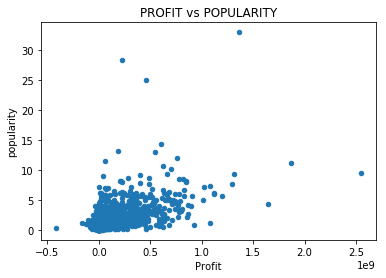

In [35]:
#Plotting a relation between budget and profit
df.plot(x='Profit',y='popularity',title='PROFIT vs POPULARITY',kind='scatter')

> From the above scatter graph we can see the direct proportionality between profit and popularity. But we also can observe some discrepencies as some movies were more popular but didn't made much profit.

### 5. Which actors are casted more number of times?

In [38]:
#Most frequent cast
#calling the separate function
num = separate('cast')
#Listing the top 8 values
num.head(8)

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
Johnny Depp          35
Harrison Ford        34
Morgan Freeman       34
dtype: int64

> We can see that the most casted actor is Roert De Niro and second comes Bruce willis with 46 movies.

<a id='conclusions'></a>
## Conclusions

> According to my analysis of the tmdb-movies dataset, Popularity of a movie made a great impact on the revenue of that movie. When a movie is popular it will most definitely be more successful in its profit% disregarding some discrepencies.
> We can see that genres like Drama, Comedy, Action and Thriller are the most released genre types. Therefore we can infer from that fact that people prefer movies from that genre.
> Most of the movies are released with a runtime of around 109 minutes.
> In the last analysis, I have listed the top 8 most number of casted actors in the movies from 1966 to 2015.

### Limitations
> As the currency for the budget and revenue were not given I had to assume as Dollar and proceed with my analysis. Also, the run time was given with no denotion.
> As the data given holds some missing values, I am forced to drop those which might sometimes end in a biased result.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])